##Collaborative filtering(SVD)

In [1]:
!pip uninstall -y numpy scikit-surprise
!pip install "numpy<2"
!pip install --no-cache-dir scikit-surprise

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Successfully uninstalled numpy-1.25.2
Found existing installation: scikit-surprise 1.1.4
Uninstalling scikit-surprise-1.1.4:
  Successfully uninstalled scikit-surprise-1.1.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-

In [2]:
!pip uninstall -y numpy
!pip install numpy==1.25.2

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy


In [38]:
# Load datasets
malll_df = pd.read_csv('/content/malll.csv')



In [5]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['CustomerID', 'StoreID', 'Rating']], reader)

In [6]:
# Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [40]:
# Build SVD model
svd_model = SVD()
svd_model.fit(trainset)

In [41]:
# Evaluate model performance (RMSE)
predictions = svd_model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.2f}")

RMSE: 1.4851
RMSE: 1.49


In [42]:
# Recommendation function
def recommend_stores(customer_id, n_recommendations=5):
    all_stores = ratings_df['StoreID'].unique()
    predictions = [(store, svd_model.predict(customer_id, store).est) for store in all_stores]
    sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    return sorted_predictions[:n_recommendations]


In [43]:
# Test recommendations for a specific customer
customer_id = 10
recommended_stores = recommend_stores(customer_id)
print(f"\nTop store recommendations for Customer {customer_id}:")
for store, rating in recommended_stores:
    print(f"Store ID: {store}, Predicted Rating: {rating:.2f}")


Top store recommendations for Customer 10:
Store ID: 102, Predicted Rating: 3.60
Store ID: 118, Predicted Rating: 3.27
Store ID: 105, Predicted Rating: 3.24
Store ID: 101, Predicted Rating: 3.23
Store ID: 107, Predicted Rating: 3.20


In [50]:
from surprise import SVD

svd_model = SVD(reg_all=0.02)
svd_model.fit(trainset)



In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
# Vectorize previous purchases
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(customers_df['PreviousPurchases'])

In [53]:
cos_sim = cosine_similarity(tfidf_matrix)

In [54]:
def recommend_similar_customers(customer_id, n_recommendations=10):
    idx = customers_df.index[customers_df['CustomerID'] == customer_id][0]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_indices = [i[0] for i in sim_scores[1:n_recommendations+1]]
    return customers_df[['CustomerID', 'FavoriteStore']].iloc[sim_indices]


customer_id = 10

print("\nCustomers with similar purchasing patterns:")
print(recommend_similar_customers(customer_id))


Customers with similar purchasing patterns:
     CustomerID FavoriteStore
9            10           Gap
10           11        Levi’s
22           23           H&M
24           25           H&M
38           39          Zara
58           59          Nike
74           75          Nike
84           85          Nike
89           90          Zara
100         101        Levi’s


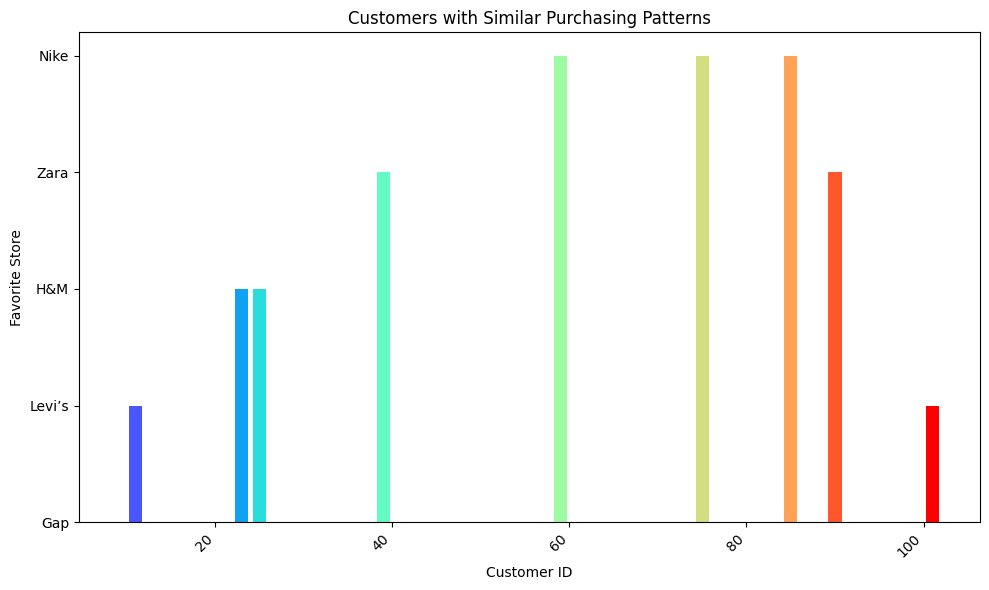

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Get recommendations for customer_id = 10
recommendations = recommend_similar_customers(customer_id=10)


customer_ids = recommendations['CustomerID']
favorite_stores = recommendations['FavoriteStore']

num_bars = len(customer_ids)
colors = plt.cm.rainbow(np.linspace(0, 1, num_bars))


plt.figure(figsize=(10, 6))
plt.bar(customer_ids, favorite_stores, color=colors, width=1.5)  #you can adjust width for thickness
plt.xlabel("Customer ID")
plt.ylabel("Favorite Store")
plt.title("Customers with Similar Purchasing Patterns")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()